In [6]:
!python -m pip install -U matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 27.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 22.5 MB/s eta 0:00:00


In [7]:
import os
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [456]:
! ls ../Exps/GAN_PI

GAN_PI_1			   GAN_PI_LL_s20_r5
GAN_PI_G_w100_LL_s5		   GAN_PI_LL_s30
GAN_PI_G_w200_LL_s5		   GAN_PI_LL_s5_lr4
GAN_PI_Gl5_Dl6			   GAN_PI_LL_s5_r5
GAN_PI_Gl6_Dl5			   GAN_PI_enforce_supervised
GAN_PI_LL_s10			   GAN_PI_higher_stochastic
GAN_PI_LL_s10_PDELL		   GAN_PI_l5
GAN_PI_LL_s10_PDELL_D_os_2_G_os_2  GAN_PI_low_stochastic
GAN_PI_LL_s10_PDELL_D_os_3_G_os_5  GAN_PI_red
GAN_PI_LL_s10_PDELL_D_os_5_G_os_3  GAN_PI_w_1
GAN_PI_LL_s10_d10_PDELL		   GAN_PI_w_2
GAN_PI_LL_s10_d5_PDELL		   GAN_PI_w_l3
GAN_PI_LL_s20


In [9]:
root="../Exps/GAN_PI"

In [487]:
model_id="GAN_PI_LL_s10_d5_PDELL"
hist=np.load(os.path.join(root,model_id,"loss_results.npy"),allow_pickle=True)
hist=hist.tolist()

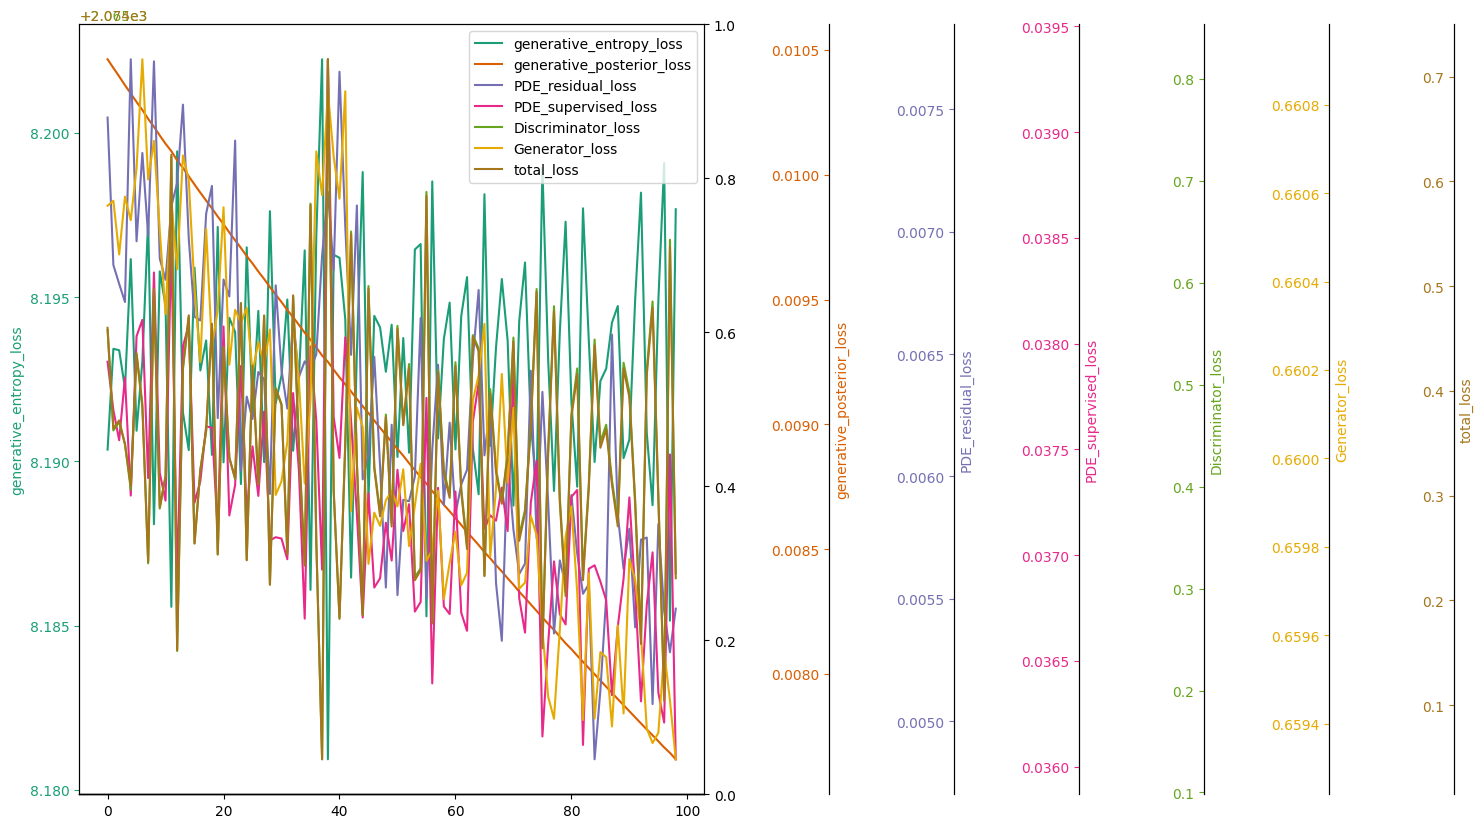

In [488]:

#plt.plot(step_loss["PDE_supervised_loss"][-100:])

step_loss={}
for k in hist[1]["train"]["generative_losses"][0].keys():
    step_loss[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
    )

inidx_1=700
inidx_2=-1
fig,axs=plt.subplots(figsize=(10,10))
fig.subplots_adjust(right=0.75)
t_lines=[]
axss=[axs]
for i,(k,color) in enumerate(zip(step_loss.keys(),colors)):
    
    if i>0:
        axs.spines.left.set_position(("axes",1.0 + i*0.2))
        axs.spines.right.set_position(("axes",1.0 + i*0.2))
        axs.spines.top.set_position(("axes",1.0 + i*0.2))
    line=axs.plot(np.arange(len(step_loss[k][inidx_1:inidx_2])),step_loss[k][inidx_1:inidx_2],color=color,label=k)
    t_lines.append(line)
    axs=axs.twinx()
    axss.append(axs)
    

for line,axs,label,color in zip(t_lines,axss,step_loss.keys(),colors):
    axs.yaxis.label.set_color(color)
    axs.set(ylabel=label)
    axs.tick_params(axis='y', colors=color)
    

t_lines=reduce(lambda x,y:x+y,t_lines)
axs.legend(t_lines,[l.get_label() for l in t_lines])

plt.show()

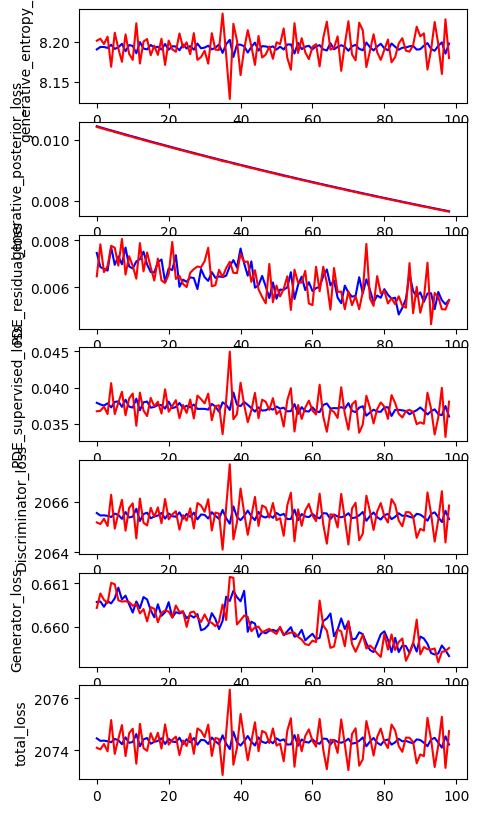

In [489]:
step_loss_train={}
step_loss_test={}
for k in hist[1]["train"]["generative_losses"][0].keys():
    step_loss_train[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["train"]["generative_losses"])) for ep in hist.keys()
    )

for k in hist[1]["test"]["generative_losses"][0].keys():
    step_loss_test[k]=list(
        reduce(lambda x,y:x+y,list(b[k] for b in hist[ep]["test"]["generative_losses"])) for ep in hist.keys()
    )
    

inidx_1=700
inidx_2=-1
#fig,axs=plt.subplots(figsize=(5,5))
fig=plt.figure(figsize=(5,10))

t_lines=[]
axs=fig.subplots(len(step_loss.keys()),1)
for i,(ax,k) in enumerate(zip(axs,step_loss.keys())):
    line=ax.plot(np.arange(len(step_loss_train[k][inidx_1:inidx_2])),step_loss_train[k][inidx_1:inidx_2],color='b',label=k)
    line=ax.plot(np.arange(len(step_loss_test[k][inidx_1:inidx_2])),step_loss_test[k][inidx_1:inidx_2],color='r',label=k)
    ax.set(ylabel=k)
    t_lines.append(line)
    axss.append(axs)

plt.show()

In [478]:
step_loss['Discriminator_loss']

[tensor(2477.4902),
 tensor(2332.0527),
 tensor(2202.7114),
 tensor(2095.0571),
 tensor(2028.6636),
 tensor(2009.0229),
 tensor(2021.8115),
 tensor(2046.5978),
 tensor(2064.2078),
 tensor(2062.3057),
 tensor(2052.3831),
 tensor(2048.0818),
 tensor(2055.2512),
 tensor(2065.7322),
 tensor(2069.0310),
 tensor(2065.4084),
 tensor(2063.5022),
 tensor(2063.0381),
 tensor(2064.1052),
 tensor(2062.6189),
 tensor(2061.5349),
 tensor(2063.0544),
 tensor(2062.5293),
 tensor(2062.2690),
 tensor(2062.0679),
 tensor(2063.1006),
 tensor(2063.1392),
 tensor(2061.5046),
 tensor(2062.7908),
 tensor(2062.5793),
 tensor(2062.8772),
 tensor(2063.6973),
 tensor(2062.6328),
 tensor(2063.2354),
 tensor(2063.6052),
 tensor(2063.2749),
 tensor(2064.0029),
 tensor(2063.2720),
 tensor(2063.8174),
 tensor(2064.0825),
 tensor(2064.0381),
 tensor(2064.0347),
 tensor(2064.1108),
 tensor(2064.4651),
 tensor(2064.2432),
 tensor(2064.7046),
 tensor(2064.2529),
 tensor(2065.1206),
 tensor(2064.9246),
 tensor(2064.8105),


In [347]:
list(step_loss.keys())

['generative_entropy_loss',
 'generative_posterior_loss',
 'PDE_residual_loss',
 'PDE_supervised_loss',
 'Discriminator_loss',
 'Generator_loss',
 'total_loss']